# Use GDELT dataset to predict Event types based series of features
Expected event types to be any of the following:
1. Verbal Cooperation
2. Material Cooperation
3. Verbal Conflict
4. Material Conflict

In [1]:
import pandas as pd 
from utils import transform_data, int_to_datetime, get_null_values

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Load data and transform

In [12]:
data = pd.read_csv("230722.csv")

column_names = [
    'GlobalEventID',
    'Day',
    'MonthYear',
    'Year',
    'FractionDate',
    'Actor1Code',
    'Actor1Name',
    'Actor1CountryCode',
    'Actor1KnownGroupCode',
    'Actor1EthnicCode',
    'Actor1Religion1Code',
    'Actor1Religion2Code',
    'Actor1Type1Code',
    'Actor1Type2Code',
    'Actor1Type3Code',
    'Actor2Code',
    'Actor2Name',
    'Actor2CountryCode',
    'Actor2KnownGroupCode',
    'Actor2EthnicCode',
    'Actor2Religion1Code',
    'Actor2Religion2Code',
    'Actor2Type1Code',
    'Actor2Type2Code',
    'Actor2Type3Code',
    'IsRootEvent',
    'EventCode',
    'EventBaseCode',
    'EventRootCode',
    'QuadClass',
    'GoldsteinScale',
    'NumMentions',
    'NumSources',
    'NumArticles',
    'AvgTone',
    'Actor1Geo_Type',
    'Actor1Geo_FullName',
    'Actor1Geo_CountryCode',
    'Actor1Geo_ADM1Code',
    'Actor1Geo_Lat',
    'Actor1Geo_Long',
    'Actor1Geo_FeatureID',
    'Actor2Geo_Type',
    'Actor2Geo_FullName',
    'Actor2Geo_CountryCode',
    'Actor2Geo_ADM1Code',
    'Actor2Geo_Lat',
    'Actor2Geo_Long',
    'Actor2Geo_FeatureID',
    'DateAdded',
    'SourceURL'
        ]

data = transform_data(data, column_names)

data = int_to_datetime(data, "day")
data = int_to_datetime(data, "dateadded")

# Let use small segment of the dataset
data_sm = data[data['year']==2022]

data_lm = data[data['year']!=2022]

# columns = data_sm.columns.tolist()
# columns.remove('quadclass')
# columns.append('quadclass')

# data_sm = data_sm[columns]

data_lm.head()

,globaleventid,day,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,actor1ethniccode,...,actor1geo_featureid,actor2geo_type,actor2geo_fullname,actor2geo_countrycode,actor2geo_adm1code,actor2geo_lat,actor2geo_long,actor2geo_featureid,dateadded,sourceurl
13,1116435795,2023-06-22,202306,2023,2023.4712,NaN,NaN,NaN,NaN,NaN,...,NaN,3,"Fort Smith, Arkansas, United States",US,USAR,35.3859,-94.3985,76952,2023-07-22,https://www.kuaf.com/show/ozarks-at-large/2023...
14,1116435796,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,...,RS,1,Russia,RS,RS,60.0000,100.0000,RS,2023-07-22,https://www.beijingbulletin.com/news/273906652...
15,1116435797,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,...,-1273769,4,"Pretoria, Gauteng, South Africa",SF,SF06,-25.7069,28.2294,-1273769,2023-07-22,https://www.beijingbulletin.com/news/273906652...
16,1116435798,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,...,RS,1,Russia,RS,RS,60.0000,100.0000,RS,2023-07-22,https://www.beijingbulletin.com/news/273906652...
17,1116435799,2023-06-22,202306,2023,2023.4712,AFR,AFRICA,AFR,NaN,NaN,...,-1273769,4,"Pretoria, Gauteng, South Africa",SF,SF06,-25.7069,28.2294,-1273769,2023-07-22,https://www.beijingbulletin.com/news/273906652...


## 2. Identify Total number of NULL of each feature 

In [14]:
get_null_values(data_lm)

actor2type3code          87517
actor1type3code          87517
actor2religion2code      87351
actor1religion2code      87289
actor2ethniccode         87168
actor1ethniccode         87011
actor2knowngroupcode     86724
actor1knowngroupcode     86627
actor2religion1code      86621
actor1religion1code      86523
actor2type2code          86025
actor1type2code          85240
actor2type1code          58516
actor1type1code          50638
actor2countrycode        48626
actor1countrycode        37956
actor2code               25351
actor2name               25351
actor1geo_fullname       11051
actor1geo_long           11051
actor1geo_lat            11051
actor1geo_featureid      11044
actor1geo_adm1code       11044
actor1geo_countrycode    11044
actor1name                8630
actor1code                8630
actor2geo_lat             2723
actor2geo_fullname        2723
actor2geo_long            2723
actor2geo_adm1code        2718
actor2geo_countrycode     2718
actor2geo_featureid       2718
actor2ge

## 3. Selection of features that seem importanace 
quadclass is the target and rest of the attributes are the feature. And I am trying to predict type of events.

In [15]:
new_data = data_lm[['actor1code', 
                    'actor1name', 
                    'actor1geo_type',
                    'actor2code', 
                    'actor2name', 
                    'actor2geo_type',
                    'isrootevent',
                    'eventcode',
                    'eventrootcode',
                    'goldsteinscale',
                    'nummentions',
                    'numsources',
                    'avgtone',
                    'quadclass']]


new_data.head() 

,actor1code,actor1name,actor1geo_type,actor2code,actor2name,actor2geo_type,isrootevent,eventcode,eventrootcode,goldsteinscale,nummentions,numsources,avgtone,quadclass
13,NaN,NaN,0,BUS,COMPANY,3,0,40,4,1.0,5,1,1.118963,Verbal Cooperation
14,AFR,AFRICA,1,NaN,NaN,1,1,43,4,2.8,4,1,0.790514,Verbal Cooperation
15,AFR,AFRICA,4,RUS,RUSSIAN,4,1,43,4,2.8,10,3,-0.491013,Verbal Cooperation
16,AFR,AFRICA,1,RUS,RUSSIAN,1,0,43,4,2.8,2,1,0.790514,Verbal Cooperation
17,AFR,AFRICA,4,RUSGOV,RUSSIAN,4,1,43,4,2.8,18,3,-0.491013,Verbal Cooperation


## 4. Set Classifcation Experiment (MultiClass)
This function initializes the training environment and creates the transformation pipeline.

In [16]:
from pycaret.classification import ClassificationExperiment

cls_exp = ClassificationExperiment()

cls_exp.setup(data=new_data,
      target='quadclass', 
      session_id=123)

,Description,Value
0,Session id,123
1,Target,quadclass
2,Target type,Multiclass
3,Target mapping,"Material Conflict: 0, Material Cooperation: 1, Verbal Conflict: 2, Verbal Cooperation: 3"
4,Original data shape,"(87552, 14)"
5,Transformed data shape,"(87552, 24)"
6,Transformed train set shape,"(61286, 24)"
7,Transformed test set shape,"(26266, 24)"
8,Ordinal features,1
9,Numeric features,6


## 5. Compare Models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation.

In [17]:
best = cls_exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3160
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8840
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.1610
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9420
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3050
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7980
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,9.1160
knn,K Neighbors Classifier,0.9985,0.9999,0.9985,0.9985,0.9985,0.9974,0.9974,1.4810
lr,Logistic Regression,0.9824,0.9994,0.9824,0.9825,0.9824,0.9698,0.9699,3.0030
lda,Linear Discriminant Analysis,0.9739,0.9979,0.9739,0.9765,0.9733,0.9552,0.9560,0.3600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## 6. Analyze Model

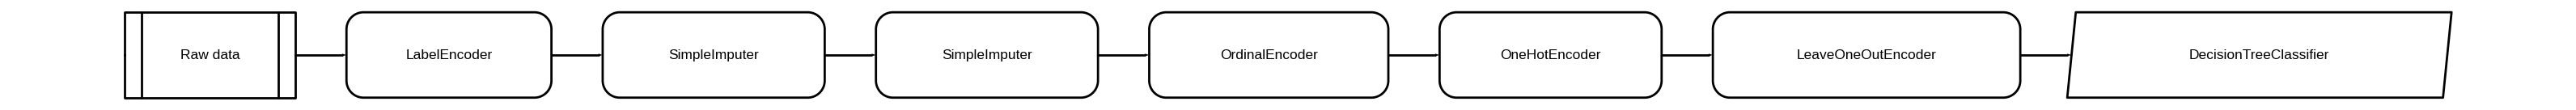

In [18]:
cls_exp.evaluate_model(best)

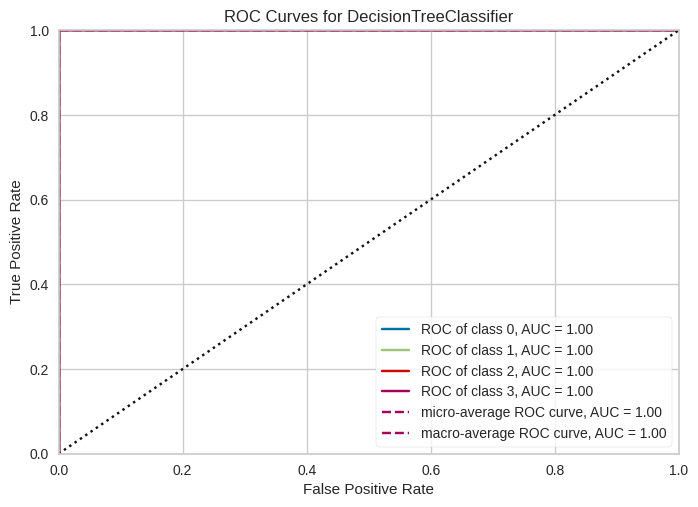

In [19]:
cls_exp.plot_model(best, plot = 'auc')

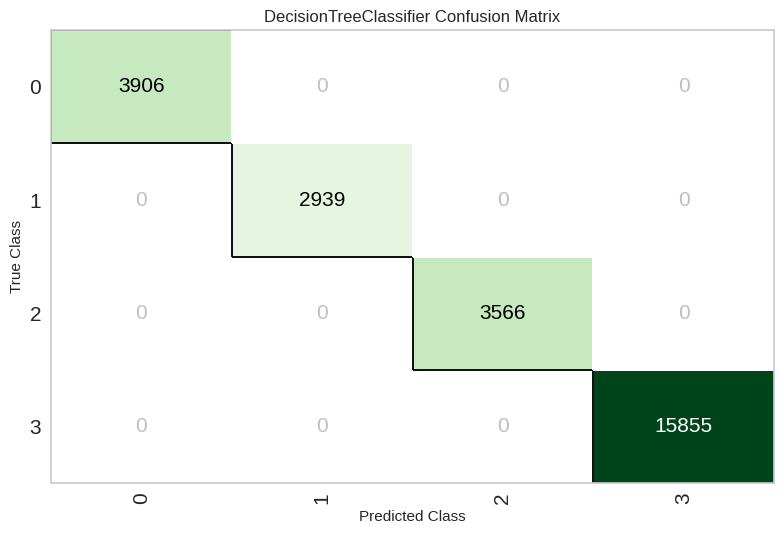

In [20]:

cls_exp.plot_model(best, plot = 'confusion_matrix')

## 7.Prediction
The predict_model function returns prediction_label and prediction_score

In [21]:
cls_exp.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,0,0,0,1.0000,1.0000


,actor1code,actor1name,actor1geo_type,actor2code,actor2name,actor2geo_type,isrootevent,eventcode,eventrootcode,goldsteinscale,nummentions,numsources,avgtone,quadclass,prediction_label,prediction_score
31450,MIL,ADMIRAL,0,NaN,NaN,0,1,141,14,-6.5,10,1,0.342466,Verbal Conflict,Verbal Conflict,1.0
48897,GBR,UNITED KINGDOM,4,EDU,SCHOOL,4,0,42,4,1.9,2,1,-1.656566,Verbal Cooperation,Verbal Cooperation,1.0
12834,USAGOV,UNITED STATES,3,USA,UNITED STATES,3,1,173,17,-5.0,3,1,-11.538462,Material Conflict,Material Conflict,1.0
44679,USAEDU,LOUISVILLE,1,USA,THE US,4,1,43,4,2.8,4,1,3.697617,Verbal Cooperation,Verbal Cooperation,1.0
85615,RUS,RUSSIA,4,MED,JOURNALIST,4,0,190,19,-10.0,2,1,-6.853932,Material Conflict,Material Conflict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27292,PAK,PAKISTAN,4,LEG,CONGRESS,4,0,46,4,7.0,1,1,-3.353293,Verbal Cooperation,Verbal Cooperation,1.0
11539,NaN,NaN,0,GOV,FIREFIGHTER,3,1,190,19,-10.0,4,1,-2.671756,Material Conflict,Material Conflict,1.0
49950,MYS,MALAYSIA,4,NaN,NaN,4,0,160,16,-4.0,10,1,-2.588997,Material Conflict,Material Conflict,1.0
47478,USA,UNITED STATES,3,NaN,NaN,3,1,43,4,2.8,38,3,3.366935,Verbal Cooperation,Verbal Cooperation,1.0


In [22]:
# Predict model on new data 
data_sm_new = data_sm[['actor1code', 
                    'actor1name', 
                    'actor1geo_type',
                    'actor2code', 
                    'actor2name', 
                    'actor2geo_type',
                    'isrootevent',
                    'eventcode',
                    'eventrootcode',
                    'goldsteinscale',
                    'nummentions',
                    'numsources',
                    'avgtone'
                ]]

predictions = cls_exp.predict_model(best, data= data_sm_new)
predictions.head()

,actor1code,actor1name,actor1geo_type,actor2code,actor2name,actor2geo_type,isrootevent,eventcode,eventrootcode,goldsteinscale,nummentions,numsources,avgtone,prediction_label,prediction_score
0,CAN,CANADA,4,CHRCTH,CATHOLIC,4,1,20,2,3.0,13,2,-3.829401,Verbal Cooperation,1.0
1,CAN,CANADA,4,CHRCTH,CATHOLIC,4,1,90,9,-2.0,13,2,-3.829401,Material Cooperation,1.0
2,CVL,COMMUNITY,4,CHRCTH,CATHOLIC,4,1,20,2,3.0,7,2,-3.829401,Verbal Cooperation,1.0
3,CVL,COMMUNITY,4,CHRCTH,CATHOLIC,4,1,90,9,-2.0,7,2,-3.829401,Material Cooperation,1.0
4,EDU,STUDENT,3,NaN,NaN,3,0,110,11,-2.0,10,1,0.393701,Verbal Conflict,1.0


## 8. Save Pipeline
Finally, save the entire pipeline on disk for later use, using pycaret's save_model function.

In [23]:
# save pipeline
cls_expsave_model(best, 'prototype_pipeline')

NameError: name 'save_model' is not defined